# Useful snippets of code for working with pyKasso #
C. Fandel 2023

In [1]:
#Import modules needed:
import os            
import sys           
import importlib
import copy
import time
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

import pykasso as pk
import karstnet as kn

#all fast-marching-related imports
import agd
from agd import Eikonal
from agd.Metrics import Riemann


os.getcwd()

'C:\\Users\\cfandel\\GitHub\\pyKasso\\notebooks\\Chloe'

## Display inlet and outlet iteration order ##

CAUTION: You are using the development version of this package.

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


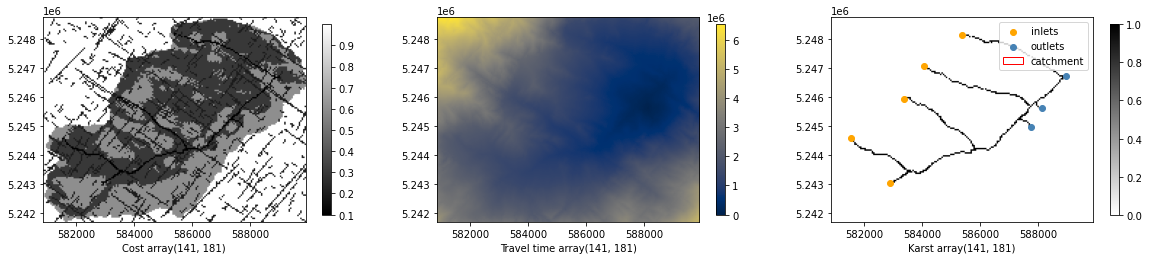

In [3]:
#Load model and simulate anisotropic network with multiple springs:
catchment = pk.SKS('settings.yaml')          #import settings and options from input folder
catchment.compute_karst_network()                               #run the model to calculate the karst network
catchment.show()

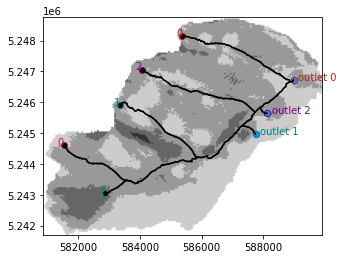

In [4]:
f,ax = plt.subplots(1,1)
plt.imshow(catchment.geology.data['geology']['data'], origin='lower', extent=catchment.grid.extent, cmap='gray_r', vmin=0,vmax=5)
catchment.show_network(ax=ax, data=catchment.karst_simulations[0], simplify=False, labels=[], plot_nodes=False, legend=False, color='k')
colors = ['firebrick', 'teal', 'purple']

for o,outlet in catchment.karst_simulations[0].points['outlets'].iterrows():
    plt.scatter(outlet.x, outlet.y, s=40, c='dodgerblue', edgecolors=colors[o])
    ax.annotate('outlet '+str(o), xy=(outlet.x+(3*catchment.grid.dx), outlet.y), color=colors[o])
    
for i,inlet in catchment.karst_simulations[0].points['inlets'].iterrows():
    outlet = int(inlet.outlet)
    plt.scatter(inlet.x,  inlet.y,  c='k', edgecolors=colors[outlet])
    ax.annotate(str(outlet), xy=(inlet[0]-(4*catchment.grid.dx), inlet[1]), color=colors[outlet])


## Compare different geology input files

In [8]:
#Calculate multiple iterations:
n             = 10               #number of iterations
shuffle       = False           #whether to shuffle inlet/outlet order
use_ref_geo   = True           #use gempy geology from Paper 2
use_ref_order = True           #use inlet/outlet order from Paper 2

catchment = pk.SKS('settings.yaml') #import settings and options from input folder

if shuffle:
    catchment.set_inlets_shuffle(True)                                    #shuffle inlet order each run
    
if use_ref_geo:
    print('use gempy geology')
    catchment.set_geological_datafile('gempy181x141.csv')
else:
    print('use arcmap geology')
    catchment.set_geological_datafile('geo181x141.csv')
    
if use_ref_order:
    print('use inlet/outlet assignment from Paper 2')
    catchment.set_inlets_data('inlets2D_reference.txt')  #load a new outlet file with all outlets
    catchment.set_outlets_data('outlets2D_reference.txt')  #load a new outlet file with all outlets
    catchment.set_outlets_importance([1,1,1])                       #assign each outlet to its own iteration
    catchment.set_inlets_per_outlet([2,2,1])                        #assign first two inlets to first outlet, next two inlets to second outlets, and last inlet to last outlet.
    catchment.set_inlets_importance([1])                            #assign all inlets for each outlet to a single iteration
else:
    print('use new inlet/outlet assignment')
    catchment.set_inlets_data('inlets2D.txt')  #load a new outlet file with all outlets
    catchment.set_outlets_data('outlets2D.txt')  #load a new outlet file with all outlets
    catchment.set_outlets_importance([1,1,1])                       #assign each outlet to its own iteration
    catchment.set_inlets_per_outlet([2,1,2])                        #assign first two inlets to first outlet, next two inlets to second outlets, and last inlet to last outlet.
    catchment.set_inlets_importance([1])                            #assign all inlets for each outlet to a single iteration    

for i in range(n):
    catchment.update_all()
    catchment.compute_karst_network()                               #run the model to calculate the karst network
    #catchment.show()

CAUTION: You are using the development version of this package.
use gempy geology
use inlet/outlet assignment from Paper 2

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected component